In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import sqlite3
import pandas as pd
import rubin_sim.maf as maf
import os

In [10]:

bins = np.arange(0,101,5)



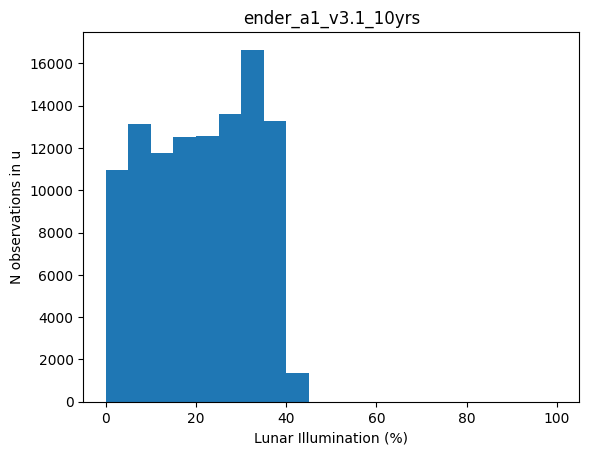

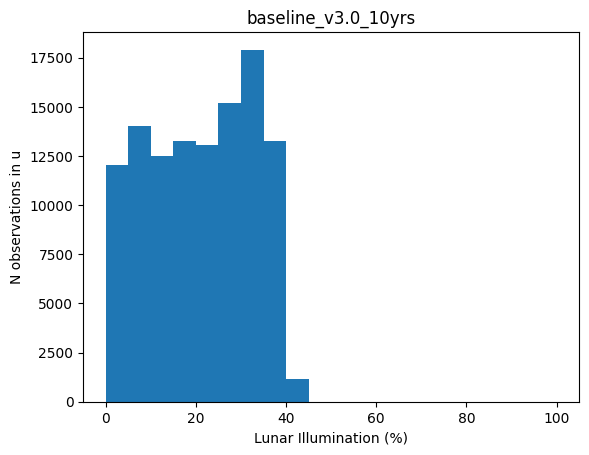

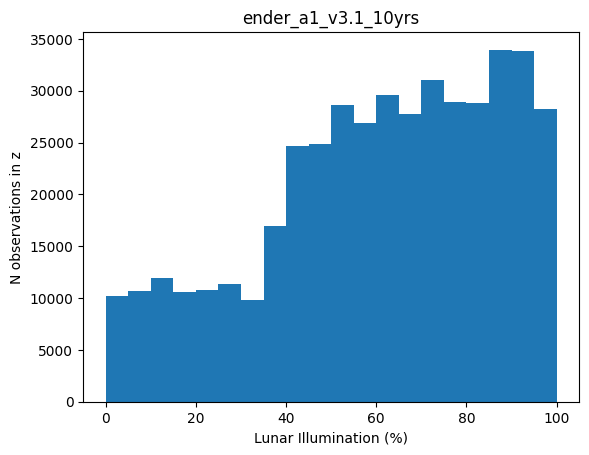

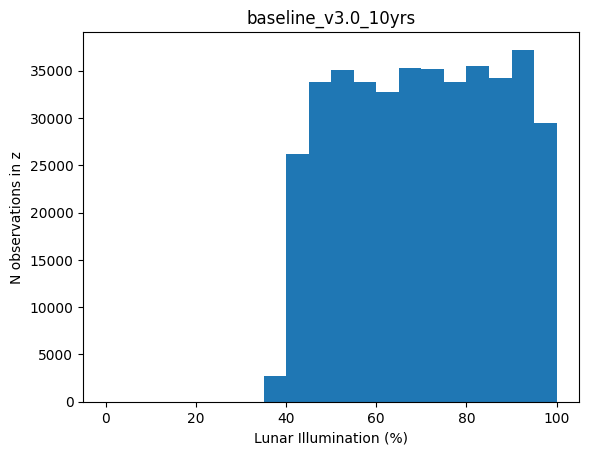

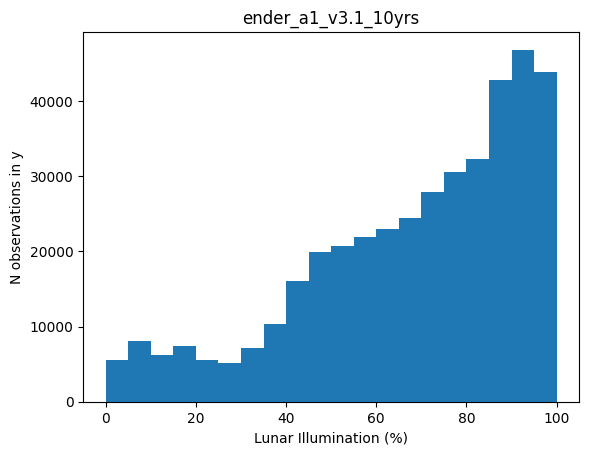

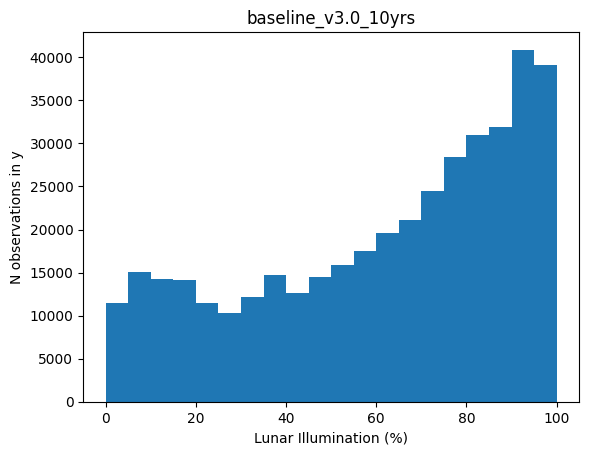

In [15]:

for filtername in 'uzy':

    con = sqlite3.connect('../ender/ender_a1_v3.1_10yrs.db')
    df = pd.read_sql('select moonPhase from observations where filter="%s";'% filtername, con)
    con.close()

    plt.figure()
    _temp = plt.hist(df['moonPhase'], bins=bins)
    plt.title('ender_a1_v3.1_10yrs')
    plt.ylabel('N observations in %s' % filtername)
    plt.xlabel('Lunar Illumination (%)')


    plt.figure()
    con = sqlite3.connect('../starter/baseline_v3.0_10yrs.db')
    df = pd.read_sql('select moonPhase from observations where filter="%s";' % filtername, con)
    con.close()

    _temp = plt.hist(df['moonPhase'], bins=bins)

    plt.title('baseline_v3.0_10yrs')
    plt.ylabel('N observations in %s' % filtername)
    plt.xlabel('Lunar Illumination (%)')


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 2135 bins, returning 200
  warnings.warn(


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 1953 bins, returning 200
  warnings.warn(


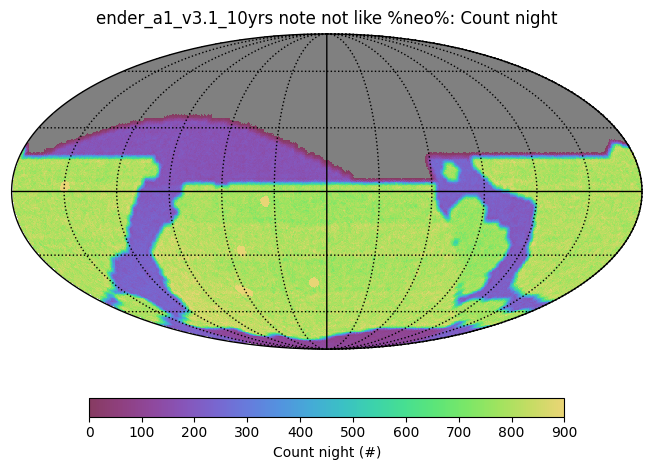

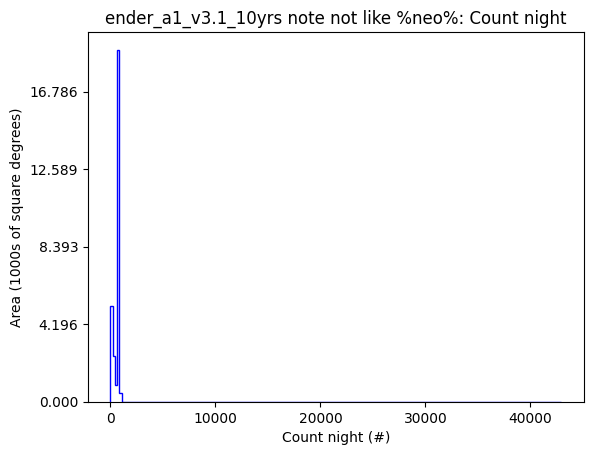

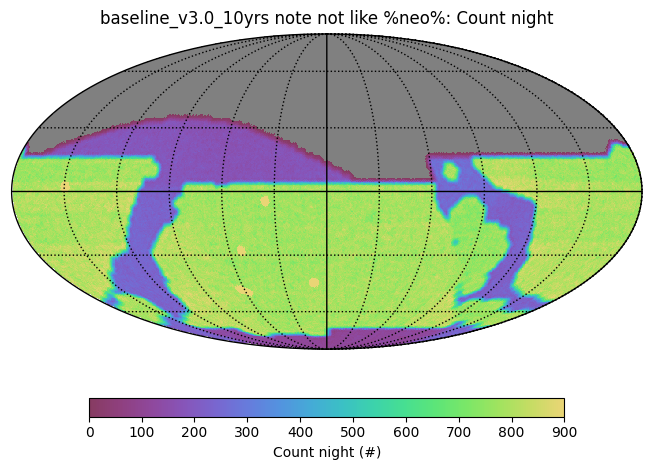

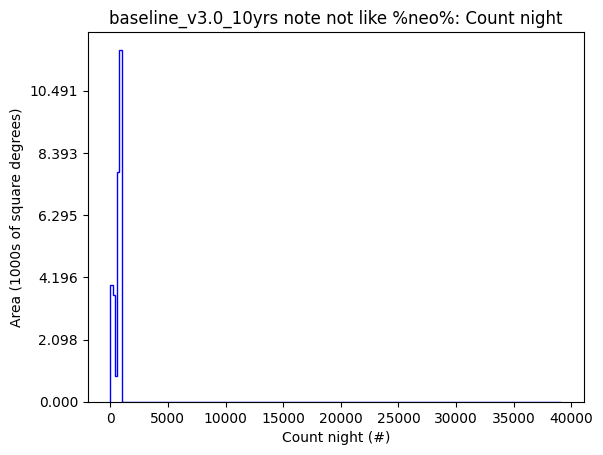

In [8]:

filename = '../ender/ender_a1_v3.1_10yrs.db'
for filename in ['../ender/ender_a1_v3.1_10yrs.db', '../starter/baseline_v3.0_10yrs.db']:

    run_name = os.path.basename(filename).replace('.db', '')
    plot_dict={'color_max': 900}
    slicer = maf.HealpixSlicer()
    metric = maf.CountMetric('night', units='#')
    # Select all visits. Here is where you could do "filter='i'" or "night < 365"
    sql = 'note not like "%neo%"'

    bundle_list = [maf.MetricBundle(metric, slicer, sql, run_name=run_name, plot_dict=plot_dict)]
    bundle_dict = maf.make_bundles_dict_from_list(bundle_list)
    bg = maf.MetricBundleGroup(bundle_dict, filename, out_dir='temp',results_db=None)
    bg.run_all()
    bg.plot_all(closefigs=False)
